# 单一机构前五大持股排名的变化

BRK

In [1]:
import pandas as pd
import numpy as np
import glob,os

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
pd.set_option('max_rows',200)

In [4]:
file = glob.glob(os.path.join("brk-13F/000106798313F-HR??-??-20??.csv"))
print(len(file))

32


In [5]:
dl = []
for f in file:
    dlTemp = pd.read_csv(f, usecols=['Name of Issuer', 'Value', 'Date'])
    dl.append(dlTemp)

dlTotal = pd.concat(dl, ignore_index=True)

In [6]:
dlTotal = dlTotal.replace('BERKSHIRE HATHAWAY INC', 'Berkshire Hathaway Inc')

In [7]:
# 统计是否重名
print(dlTotal['Name of Issuer'].value_counts().sort_index())

ABBVIE INC                        3
AMAZON COM INC                   18
AMERICAN AIRLS GROUP INC         41
AMERICAN EXPRESS CO             226
AON PLC                           3
APPLE INC                       202
AT&T INC                          7
AXALTA COATING SYS LTD           57
BANK AMER CORP                  172
BANK OF NEW YORK MELLON CORP    246
BARRICK GOLD CORPORATION          3
BIOGEN INC                       10
BRISTOL-MYERS SQUIBB CO           3
CHARTER COMMUNICATIONS INC D     16
CHARTER COMMUNICATIONS INC N     31
CHEVRON CORP NEW                  2
CHICAGO BRIDGE & IRON CO N V     19
COCA COLA CO                    261
CONOCOPHILLIPS                   12
COSTCO WHSL CORP NEW             29
DAVITA HEALTHCARE PARTNERS I     62
DAVITA INC                        2
DEERE & CO                       40
DELTA AIR LINES INC DEL          31
DIRECTV                          26
DISH NETWORK CORP                 2
EXPRESS SCRIPTS HLDG CO           1
EXXON MOBIL CORP            

In [8]:
dlTotal

,Name of Issuer,Value,Date
0,AMERICAN AIRLS GROUP INC,666026,2018-12-31
1,AMERICAN AIRLS GROUP INC,732200,2018-12-31
2,AMERICAN AIRLS GROUP INC,4982,2018-12-31
3,AMERICAN EXPRESS CO,186078,2018-12-31
4,AMERICAN EXPRESS CO,1641925,2018-12-31
...,...,...,...
4764,LIBERTY GLOBAL PLC,384937,2015-12-31
4765,LIBERTY GLOBAL PLC,299536,2015-12-31
4766,LIBERTY GLOBAL PLC,6032,2015-12-31
4767,LIBERTY GLOBAL PLC,15362,2015-12-31


In [9]:
dlGrouped = dlTotal.groupby(by=['Date', 'Name of Issuer'])

In [10]:
dlSelected = dlGrouped.agg({'Value': sum})['Value'].groupby(level=0, group_keys=False).nlargest(5)

In [11]:
print(dlSelected.reset_index()['Name of Issuer'].value_counts().sort_index())

AMERICAN EXPRESS CO             27
APPLE INC                       17
BANK AMER CORP                  15
COCA COLA CO                    32
INTERNATIONAL BUSINESS MACHS    15
KRAFT HEINZ CO                  17
PROCTER & GAMBLE CO              3
WAL MART STORES INC              6
WELLS FARGO & CO NEW            28
Name: Name of Issuer, dtype: int64


In [20]:
dlSelected = pd.DataFrame(dlSelected).reset_index()

In [21]:
dlRes = dlSelected.pivot_table(values='Value', index=dlSelected.Date, columns='Name of Issuer', aggfunc='first')

In [22]:
dlRes = dlRes.fillna(0)/1000000
dlFormat = dlRes.replace(regex=r'-03-31$', value='Q1').replace(regex=r'-06-30$', value='Q2').replace(regex=r'-09-30$', value='Q3').replace(regex=r'-12-31$', value='Q4')

In [15]:
dlFormat = dlFormat.reset_index()
dlFormat = dlFormat.replace(regex=r'-03-31$', value='Q1').replace(regex=r'-06-30$', value='Q2').replace(regex=r'-09-30$', value='Q3').replace(regex=r'-12-31$', value='Q4')

In [16]:
columns = dlFormat.columns[1:]
colors = [plt.cm.Spectral(i/float(len(columns)-1)) for i in range(len(columns))]
# Initialize the vertical-offset for the stacked bar chart.


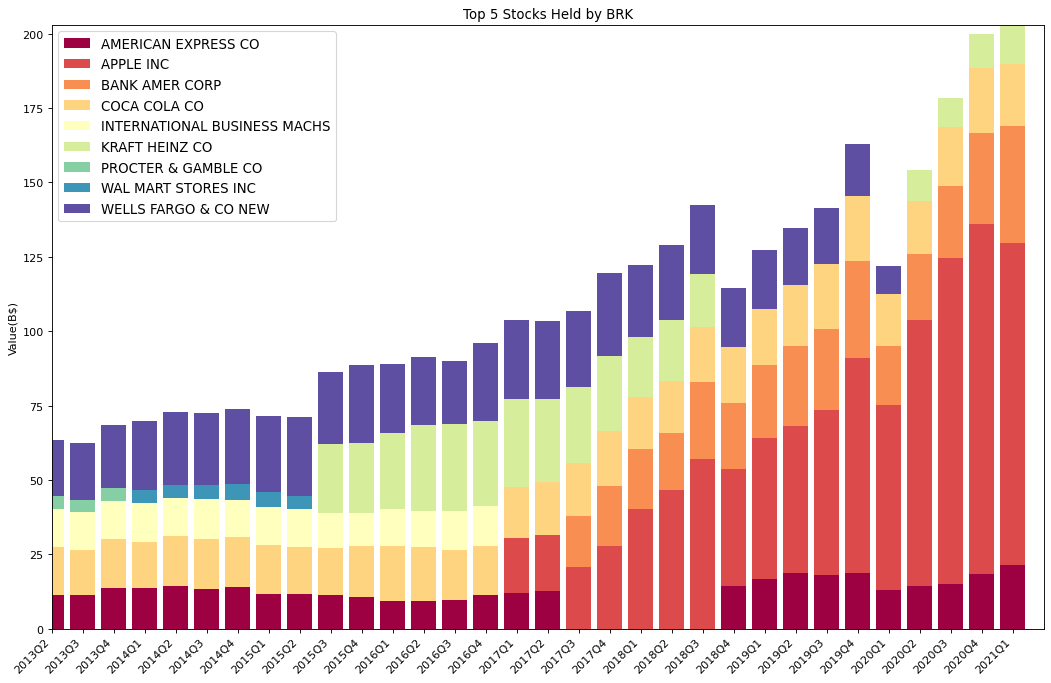

In [26]:
# Draw
fig, ax = plt.subplots(1,1,figsize=(16, 10), dpi= 80)

x_range = np.arange(len(dlFormat)) + 0.5

for i in range(len(columns)):
    ax.bar(x_range, dlFormat[columns[i]].values, tick_label=dlFormat['Date'], bottom=y_offset, label=columns[i], color=colors[i])
    y_offset = y_offset + dlFormat[columns[i]].values

ax.set(ylabel='Value(B$)',
       title="Top 5 Stocks Held by BRK")

ax.legend(loc='best', fontsize=12)

plt.xticks(rotation=45, horizontalalignment='right')
plt.xlim(0, len(dlFormat))

fig.savefig("Top_5_Stocks_Held_by_BRK.png")
plt.show()